In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow .keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
train= ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [9]:
train_data = train.flow_from_directory('CNN/satellite_data/train',
                                       batch_size = 3,
                                      class_mode = 'binary')

validation_data = validation.flow_from_directory('CNN/satellite_data/Validation',
                                      batch_size = 3,
                                      class_mode = 'binary')




Found 202 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [10]:
train_data.class_indices

{'Good_Period_for_Planting': 0, 'Not_Good_Period_for_Planting': 1}

In [11]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu",input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
hist = model.fit(train_data, epochs=150, validation_data = validation_data)

Epoch 1/150
68/68 [==============================] - 13s 169ms/step - loss: 0.7233 - accuracy: 0.6386 - val_loss: 0.1485 - val_accuracy: 0.9479
Epoch 2/150
68/68 [==============================] - 10s 154ms/step - loss: 0.4481 - accuracy: 0.8564 - val_loss: 0.3265 - val_accuracy: 0.9062
Epoch 3/150
68/68 [==============================] - 10s 150ms/step - loss: 0.1523 - accuracy: 0.9505 - val_loss: 0.1580 - val_accuracy: 0.9583
Epoch 4/150
68/68 [==============================] - 11s 167ms/step - loss: 0.4207 - accuracy: 0.8812 - val_loss: 0.3233 - val_accuracy: 0.8958
Epoch 5/150
68/68 [==============================] - 11s 168ms/step - loss: 0.1202 - accuracy: 0.9653 - val_loss: 0.1948 - val_accuracy: 0.9271
Epoch 6/150
68/68 [==============================] - 12s 169ms/step - loss: 0.1409 - accuracy: 0.9455 - val_loss: 0.2210 - val_accuracy: 0.8958
Epoch 7/150
68/68 [==============================] - 11s 163ms/step - loss: 0.1330 - accuracy: 0.9554 - val_loss: 0.2906 - val_accuracy:

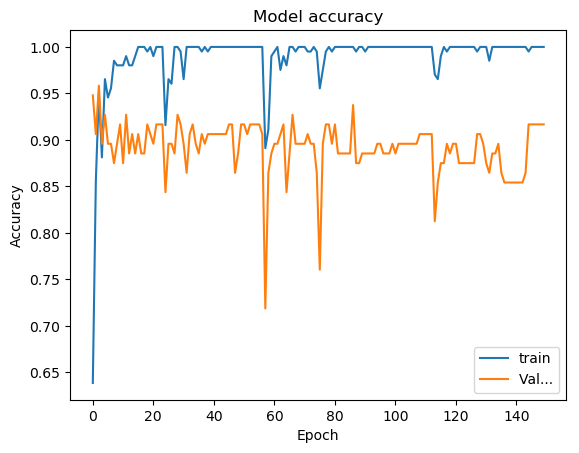

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'Val...'], loc='lower right')
plt.show()

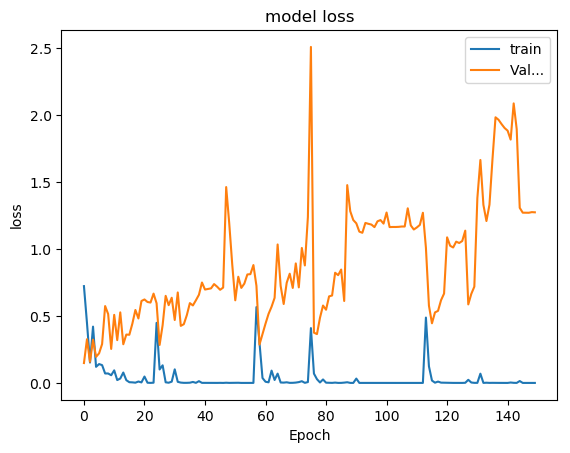

In [15]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','Val...'],loc='upper right')
plt.show()

$AUGMENTATION$

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [17]:
train_data_gen = image_gen.flow_from_directory(batch_size=3,
                                               directory='CNN/satellite_data/train',
                                               shuffle=True,
                                               target_size=(256, 256))

Found 202 images belonging to 2 classes.


In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [19]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=90)

In [20]:
train_data_gen = image_gen.flow_from_directory(batch_size=3,
                                               directory='CNN/satellite_data/train',
                                               shuffle=True,
                                               target_size=(256, 256))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 202 images belonging to 2 classes.


In [21]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.1) 

In [22]:
train_data_gen = image_gen.flow_from_directory(batch_size=3,
                                               directory='CNN/satellite_data/train',
                                               shuffle=True,
                                               target_size=(256,256))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 202 images belonging to 2 classes.


In [23]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [24]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=3,
                                                     directory='CNN/satellite_data/train',
                                                     shuffle=True,
                                                     target_size=(256,256),
                                                     class_mode='binary')

Found 202 images belonging to 2 classes.


In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

In [26]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [27]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=3,
                                                 directory='CNN/satellite_data/train',
                                                 target_size=(256,256),
                                                 class_mode='binary')

Found 202 images belonging to 2 classes.


In [28]:
model_new =model

In [29]:
model_new.compile(optimizer=RMSprop(lr=0.002),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


In [35]:
history = model_new.fit_generator(
    train_data_gen,
    epochs=500,
    validation_data= val_data_gen,
)

Epoch 1/500


c:\Users\Rinew\anaconda3\envs\Tensorflow_CPU\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


68/68 [==============================] - 12s 173ms/step - loss: 0.6189 - accuracy: 0.9554 - val_loss: 0.0362 - val_accuracy: 0.9802
Epoch 2/500
68/68 [==============================] - 12s 175ms/step - loss: 0.4073 - accuracy: 0.9406 - val_loss: 0.0368 - val_accuracy: 0.9851
Epoch 3/500
68/68 [==============================] - 12s 181ms/step - loss: 0.0750 - accuracy: 0.9802 - val_loss: 0.0180 - val_accuracy: 0.9950
Epoch 4/500
68/68 [==============================] - 13s 194ms/step - loss: 0.6522 - accuracy: 0.9505 - val_loss: 0.1394 - val_accuracy: 0.9703
Epoch 5/500
68/68 [==============================] - 13s 196ms/step - loss: 0.2925 - accuracy: 0.9604 - val_loss: 0.0300 - val_accuracy: 0.9851
Epoch 6/500
68/68 [==============================] - 13s 187ms/step - loss: 0.2447 - accuracy: 0.9554 - val_loss: 0.2912 - val_accuracy: 0.9257
Epoch 7/500
68/68 [==============================] - 14s 209ms/step - loss: 0.1308 - accuracy: 0.9604 - val_loss: 0.0565 - val_accuracy: 0.9950
Epoc

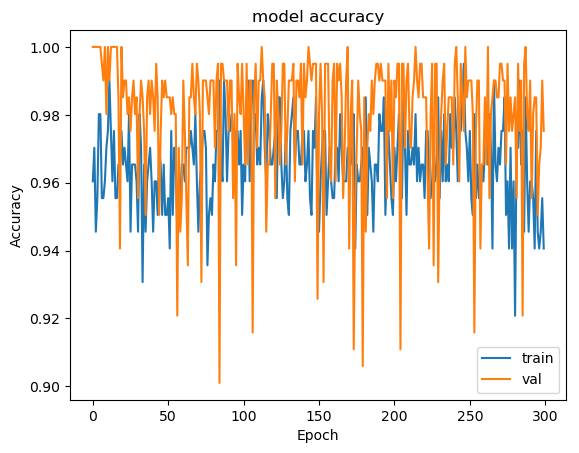

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc = 'lower right')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

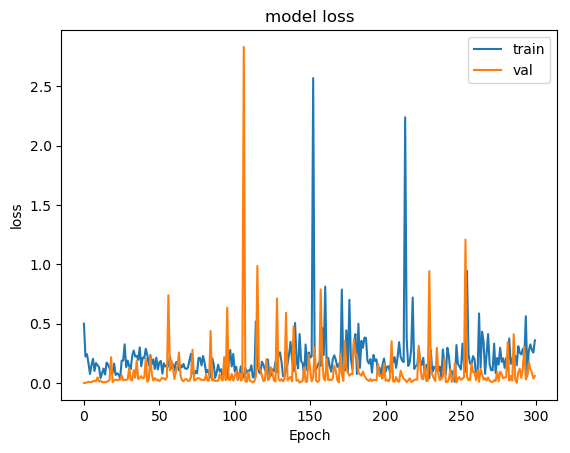

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper right')
plt.show

In [33]:
validation_data.class_indices

{'Good_Period_for_Planting': 0, 'Not_Good_Period_for _Planting': 1}

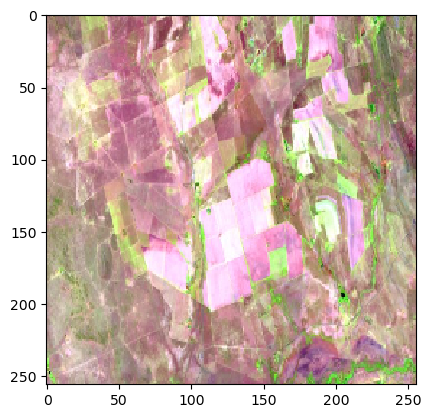

1/1 [==============================] - 0s 219ms/step
Good time for planting


In [34]:
dir_path = 'CNN/satellite_data/Testing'

for i in os.listdir(dir_path):
    imge = image.load_img(dir_path+'//' + i,target_size=(256,256))
    plt.imshow(imge)
    plt.show()
    
    x = image.img_to_array(imge)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    val = model.predict(images)
    if val ==0:
        print('Not good time for Planting')
    else:
        print('Good time for planting')

